### Building Functions

In [5]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
        
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)  
    
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [6]:
lst = [1,2,3,4,5,6,7,3,12,15,13]
lst2 = [1,2,3,2,4,6,5,4,6,14, 12]
print("list 1 total:", total(lst))
print("list 2 total:", total(lst2))
print("list 1 mean:", mean(lst))
print("list 2 mean:", mean(lst2))
print("list 1 median:", median(lst))
print("list 2 median:", median(lst2))
print("list 1 mode:", mode(lst))
print("list 2 mode:", mode(lst2))
print("variance:", variance(lst, sample = True))
print("variance (sample):", variance(lst2, sample = False))
print("standard deviation:", SD(lst, sample = True))
print("standard deviation (sample):", SD(lst2, sample = False))
print("covariance:", covariance(lst, lst2))
print("correlation:", correlation(lst, lst2))
print("skewness:", skewness(lst, sample = True))
print("skewness (sample):", skewness(lst2, sample = False))
print("kurtosis:", kurtosis(lst, sample = True))
print("kurtosis (sample):", kurtosis(lst2, sample = False))

list 1 total: 71
list 2 total: 59
list 1 mean: 6.454545454545454
list 2 mean: 5.363636363636363
list 1 median: 5
list 2 median: 4
list 1 mode: [3]
list 2 mode: [2, 4, 6]
variance: 22.872727272727275
variance (sample): 15.50413223140496
standard deviation: 4.782544016810224
standard deviation (sample): 3.9375286959468574
covariance: 16.56198347107438
correlation: 0.9224142037215403
skewness: 0.8090054968478286
skewness (sample): 1.1308864499207032
kurtosis: -0.7609792294866629
kurtosis (sample): 3.0860038825064446


# creates a functions that generates stats foor each column of data

In [11]:
def gather_statistics(df, sample = True):
    # create a dictionary of dictionaries with an entry for each column of data in a datafram, df
    dct = {key:{} for key in df}
    # call each column of data and its name (key)
    # df.items makes a list of tuples where tuple index 0 refers to the key, 
    # index 1 refers to object pointed to by key
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis = 0, inplace = True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

In [14]:
import pandas_datareader.data as web
import datetime
import pandas as pd

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-09-30 10:25:11.625980


In [15]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [16]:
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-09-24,774.799988,744.559998,745.890015,774.390015,21336900.0,774.390015
2021-09-27,799.000000,769.309998,773.119995,791.359985,28070700.0,791.359985
2021-09-28,795.640015,766.179993,787.200012,777.559998,25381400.0,777.559998


In [17]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [18]:
data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
2021-09-27  296.470001  292.940002  296.140015  294.170013  23571700.0   
2021-09-28  290.779999  282.750000  289.799988  283.519989  43186200.0   
2021-09-29  286.769989  283.010010  285.100006  284.000000  26319400.0   
2021-09-30  287.829987  284.859985  285.709991  286.075012   8444972.0   

             Adj Close  

In [19]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-09-24,299.350006,146.919998,352.959991,774.390015
2021-09-27,294.170013,145.369995,353.579987,791.359985
2021-09-28,283.519989,141.910004,340.649994,777.559998


Text(0.5, 1.0, 'Close\nDaily Stock Prices ')

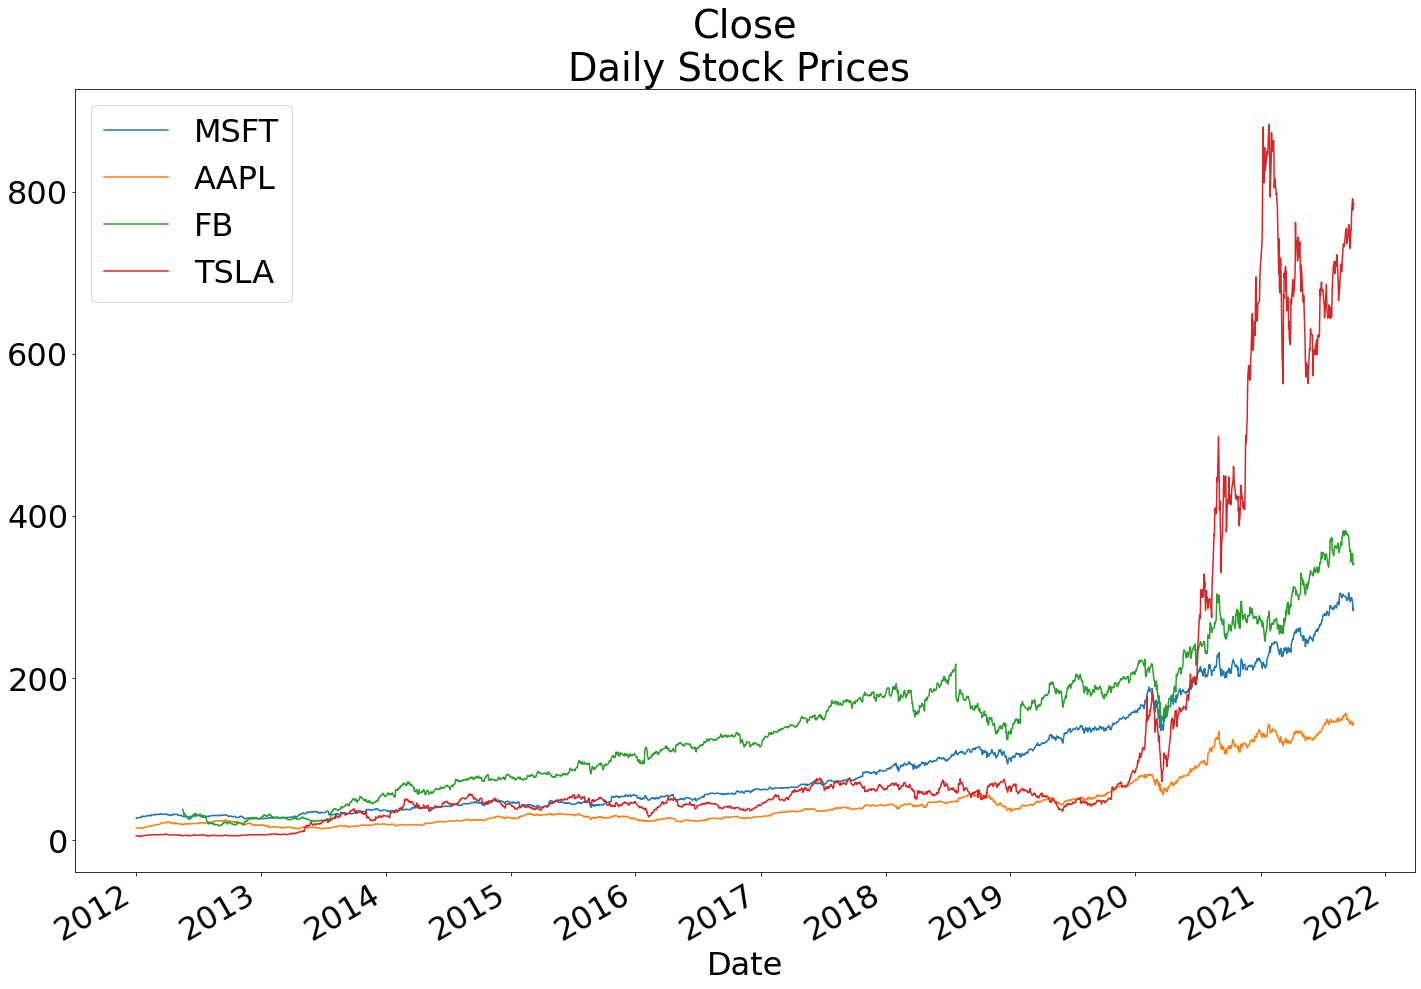

In [20]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")

### It is helpful to log the y axis ti view change in terms of proportion

<ipython-input-21-06bd7b00ad49>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

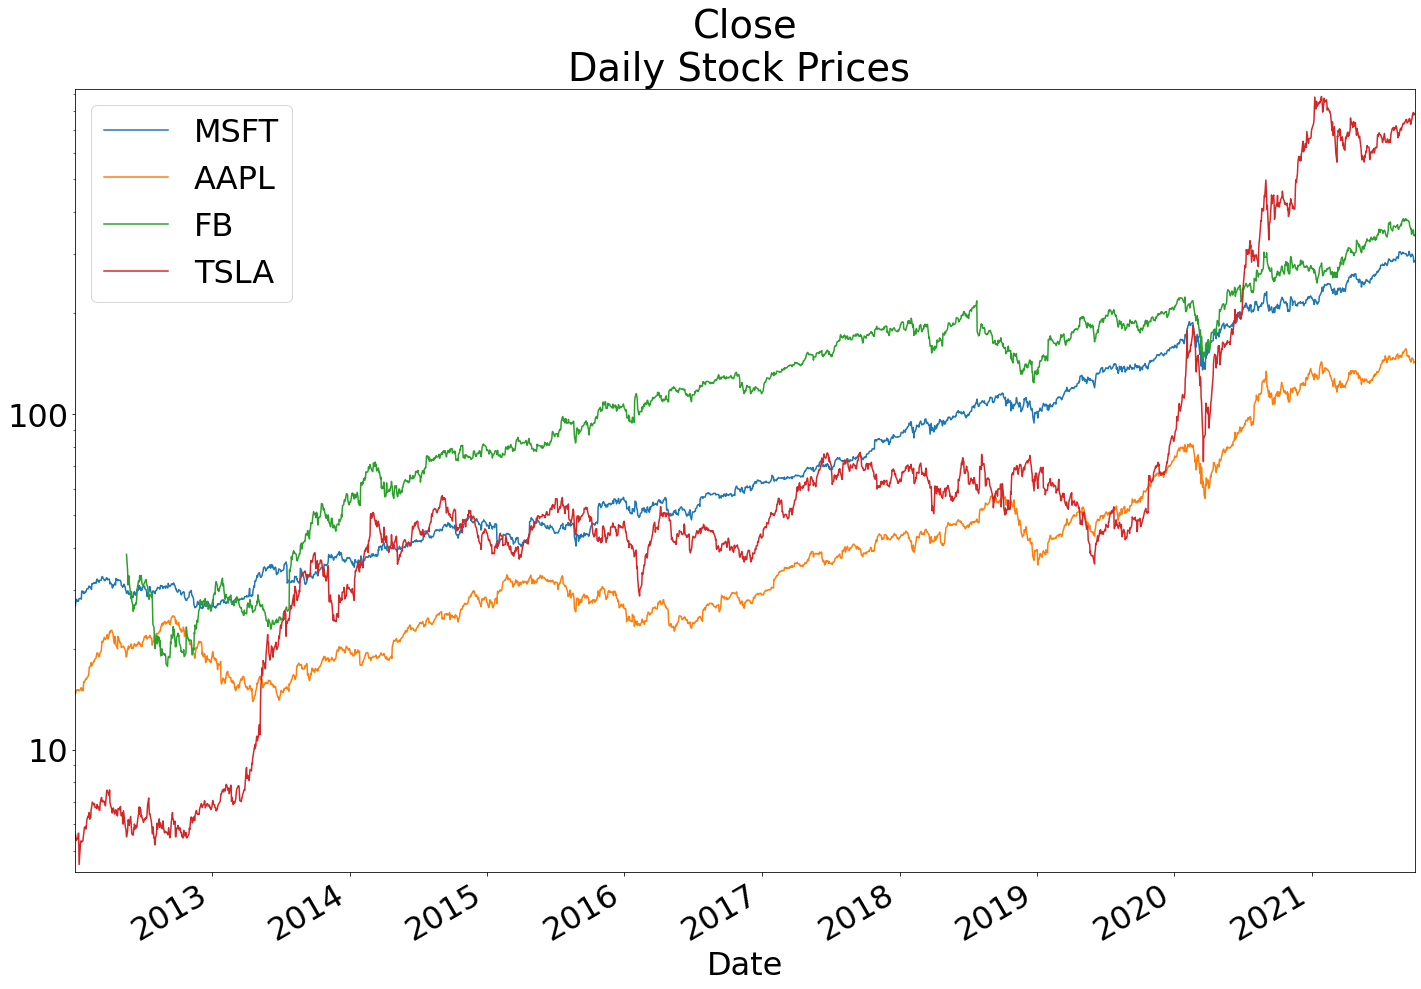

In [21]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices ")
ax.set_yscale("log")
# reset y-ticklabels so that they are not in scientific notation
y_vals = ax.get_yticks()
# transform values into integers, set as new ytick values
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [25]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100

<ipython-input-30-20736107244c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


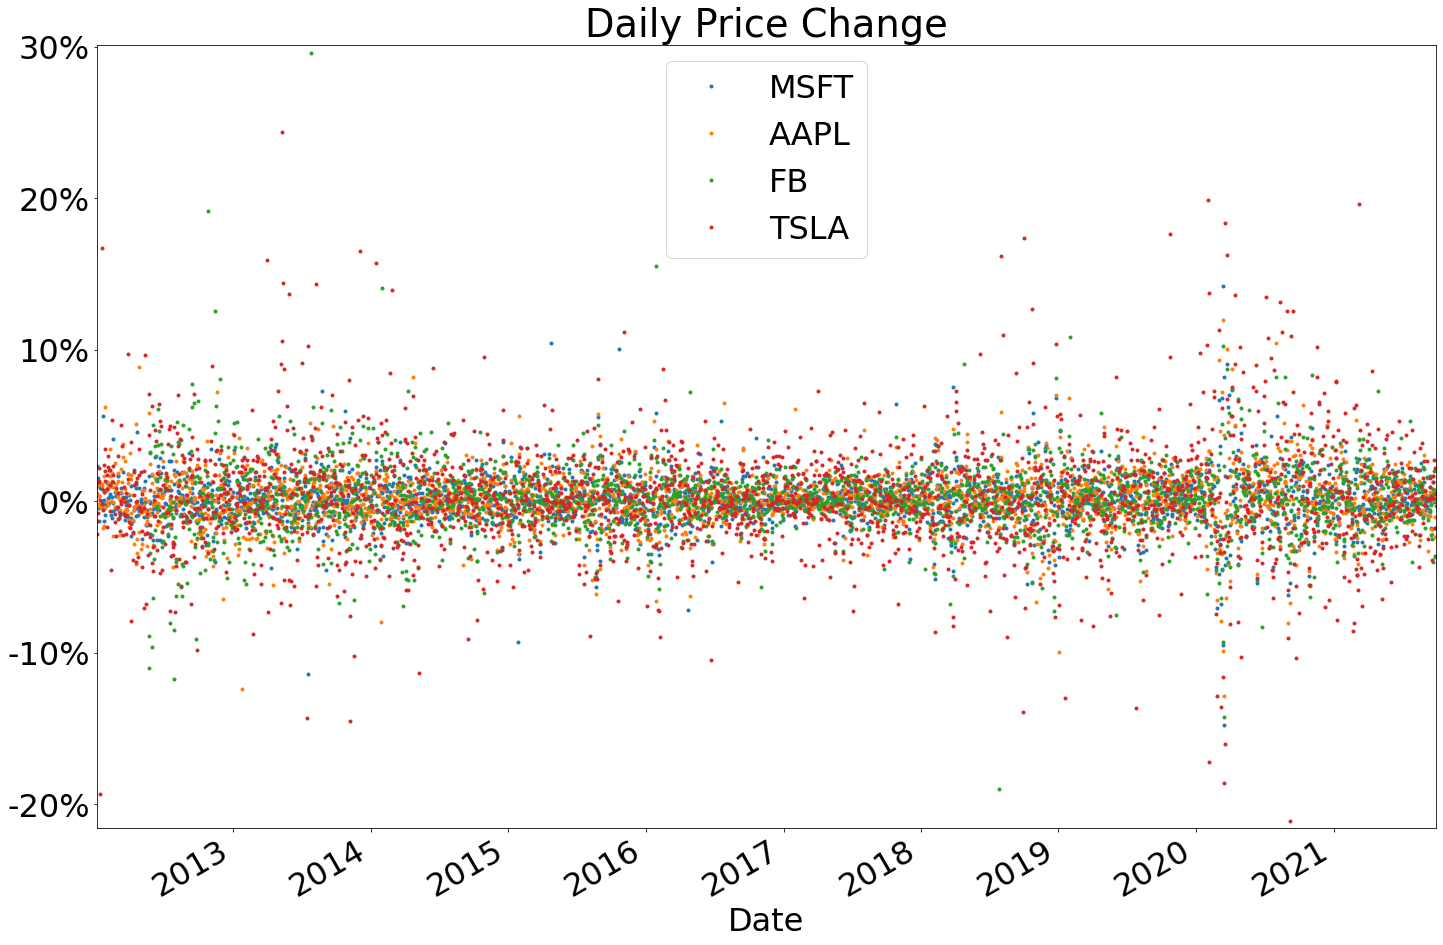

In [30]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

In [31]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.110,0.109,0.120,0.263
median,0.069,0.079,0.105,0.135
variance,2.596,3.218,5.376,12.262
S.D.,1.611,1.794,2.319,3.502
skewness,0.045,-0.120,0.945,0.432
kurtosis,10.763,6.445,18.590,6.250


<ipython-input-39-af641c2351a3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-39-af641c2351a3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


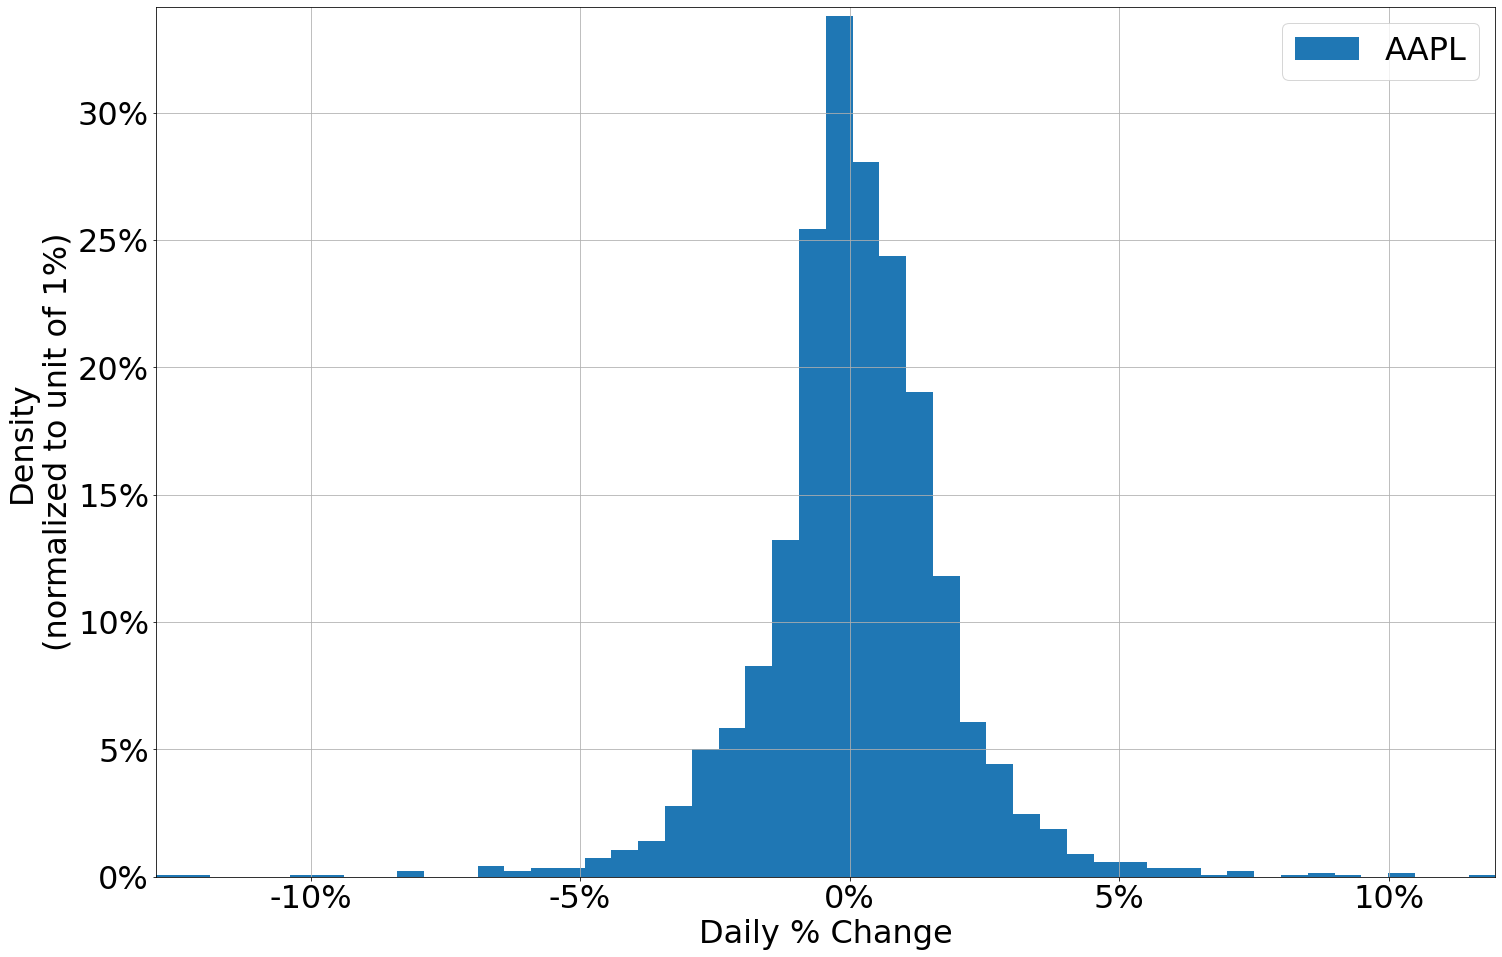

In [39]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["AAPL"].hist(bins = 50,
                               density = True,
                               label = "AAPL")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Daily % Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
ax.set_ylabel("Density\n(normalized to unit of 1%)")

plt.legend()
plt.show()

## create a figure with 4 density distribution plots

array([<AxesSubplot:title={'center':'MSFT'}>,
       <AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>], dtype=object)

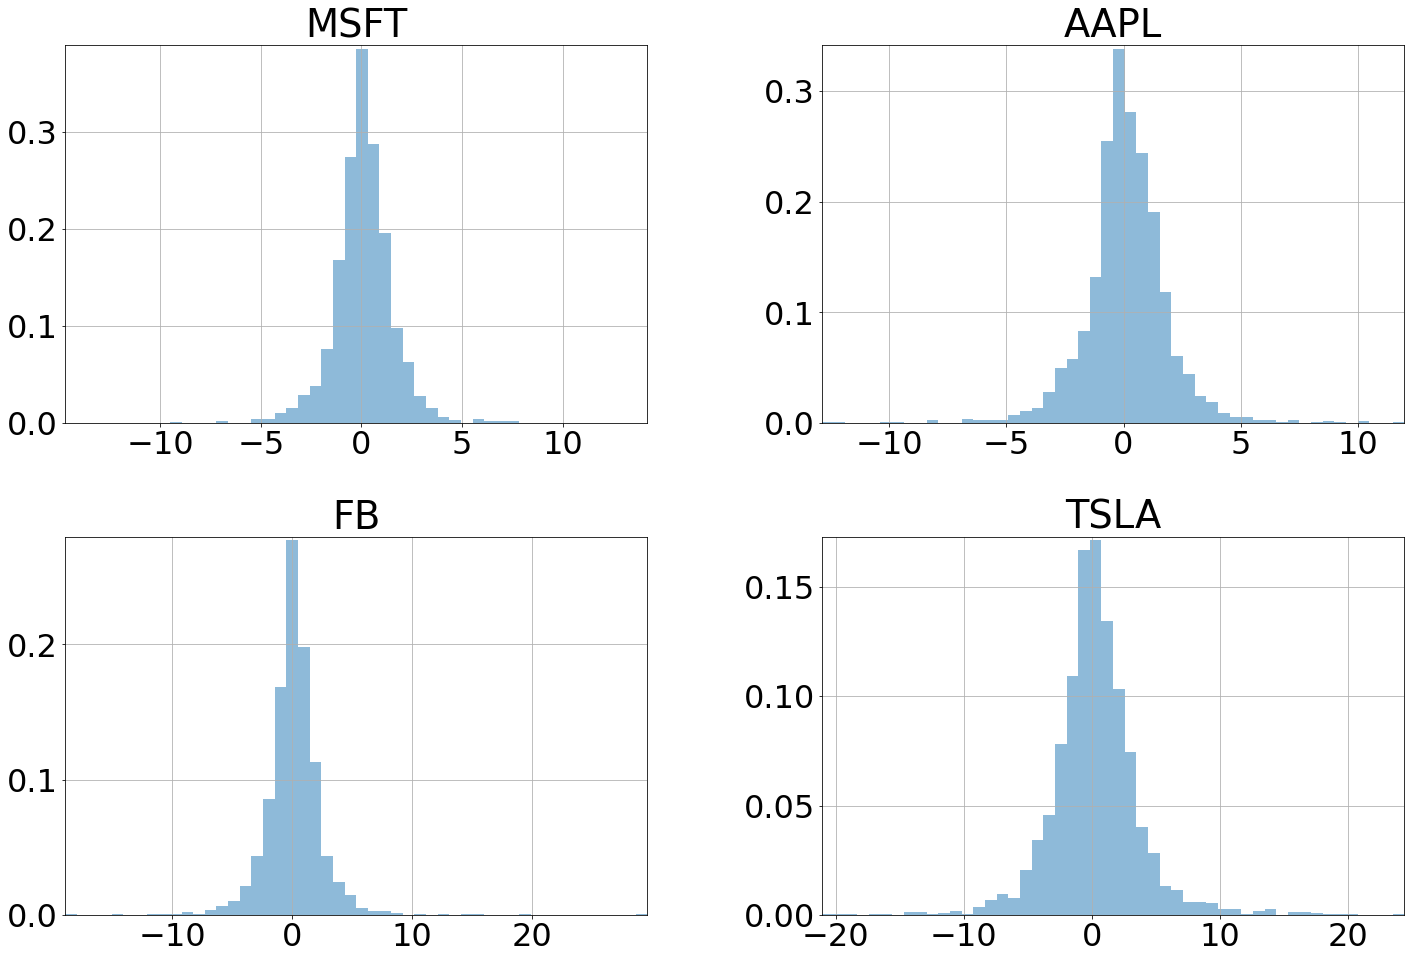

In [44]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)

## Trasnform axis tick labels

<ipython-input-52-5c5cd5b6660f>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-52-5c5cd5b6660f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


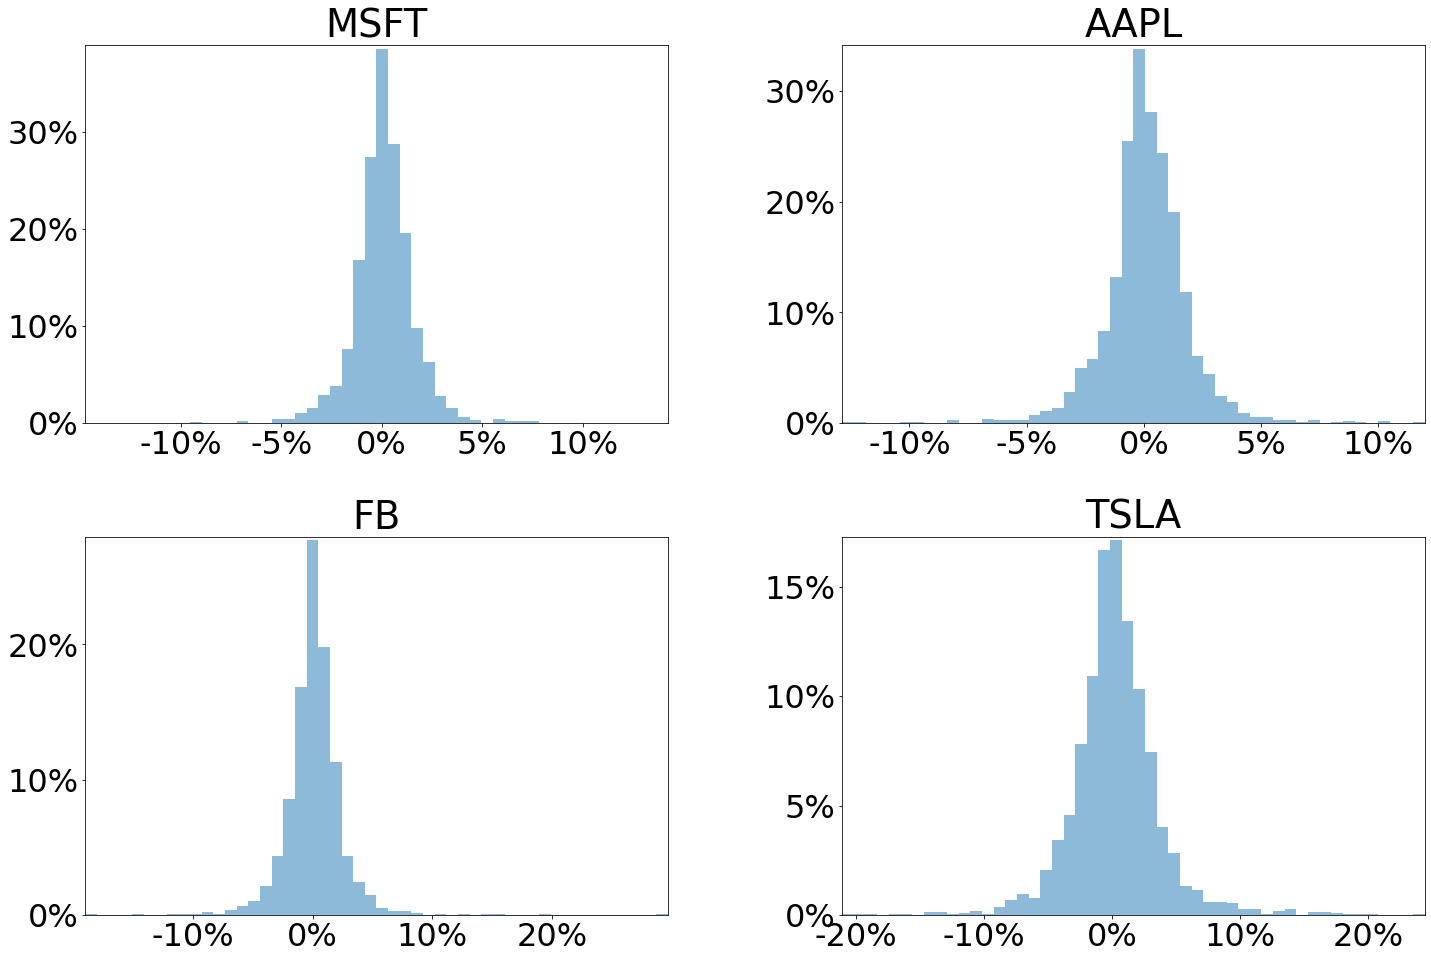

In [52]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax [i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        
        a.grid(False)

<ipython-input-60-28cfd4e48dae>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
<ipython-input-60-28cfd4e48dae>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])


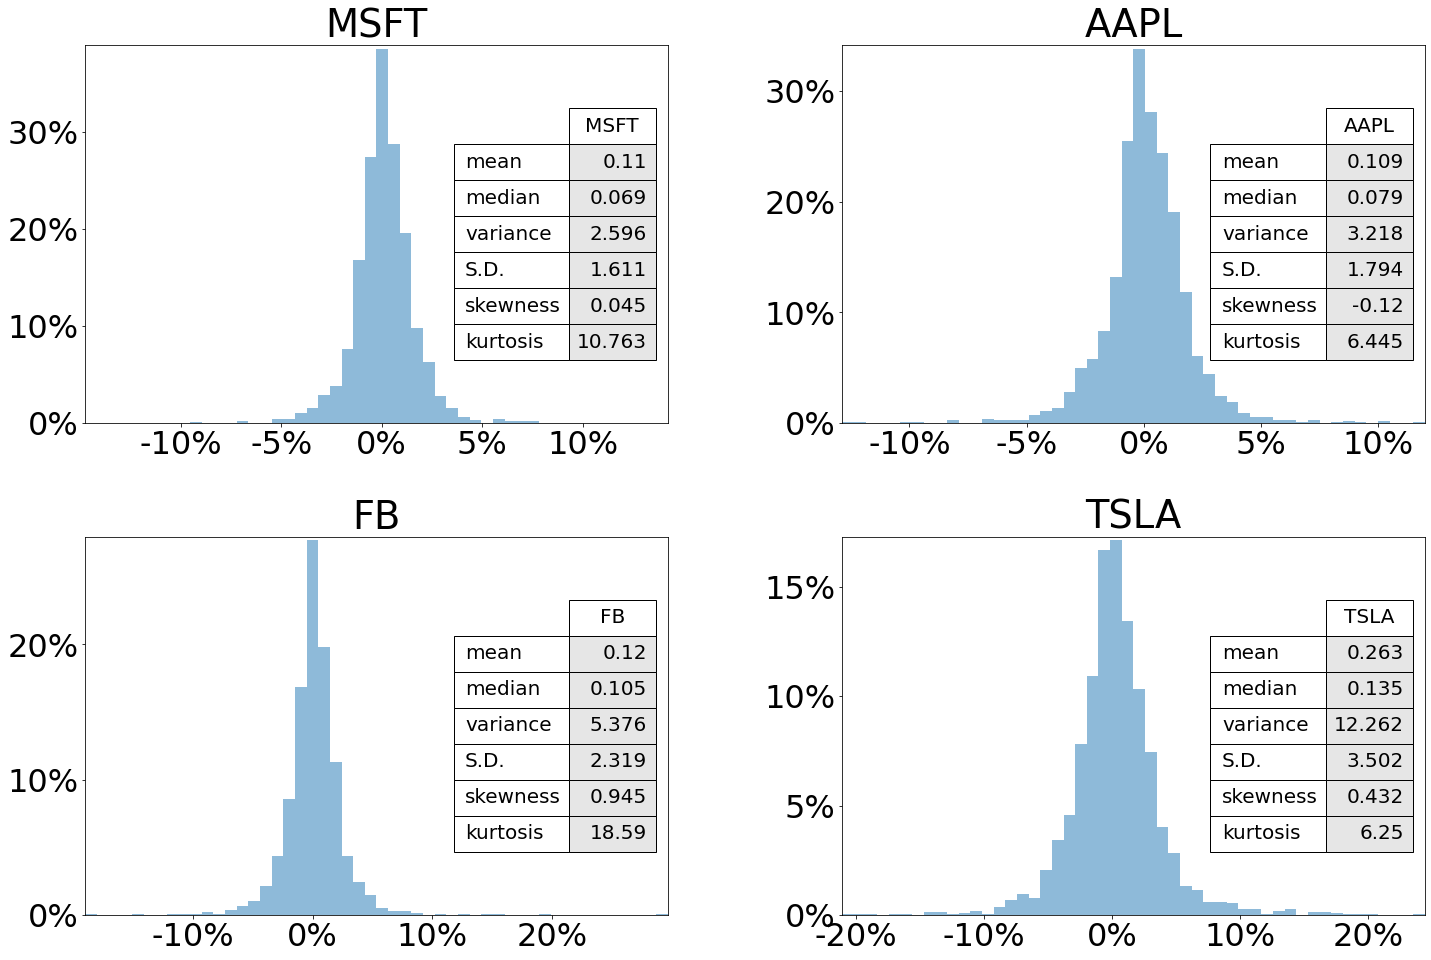

In [60]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                       alpha = .5,
                       label = price_change_data.keys(),
                       density = True,
                       ax = ax)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # identify object in ax that is the graph of interest
        a = ax [i][j]
        # identify name for stock data plotted
        stock = a.get_title()
        # set title as stock name
        a.set_title(stock)
        # resformat x and y tick values
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        a.grid(False)

        hist_data = stats_df[stock]
        stats_table = table(a,
                            hist_data,
                            colWidths = [.1],
                            cellColours = [[(.9,.9,.9)]] * 6,
                            loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)

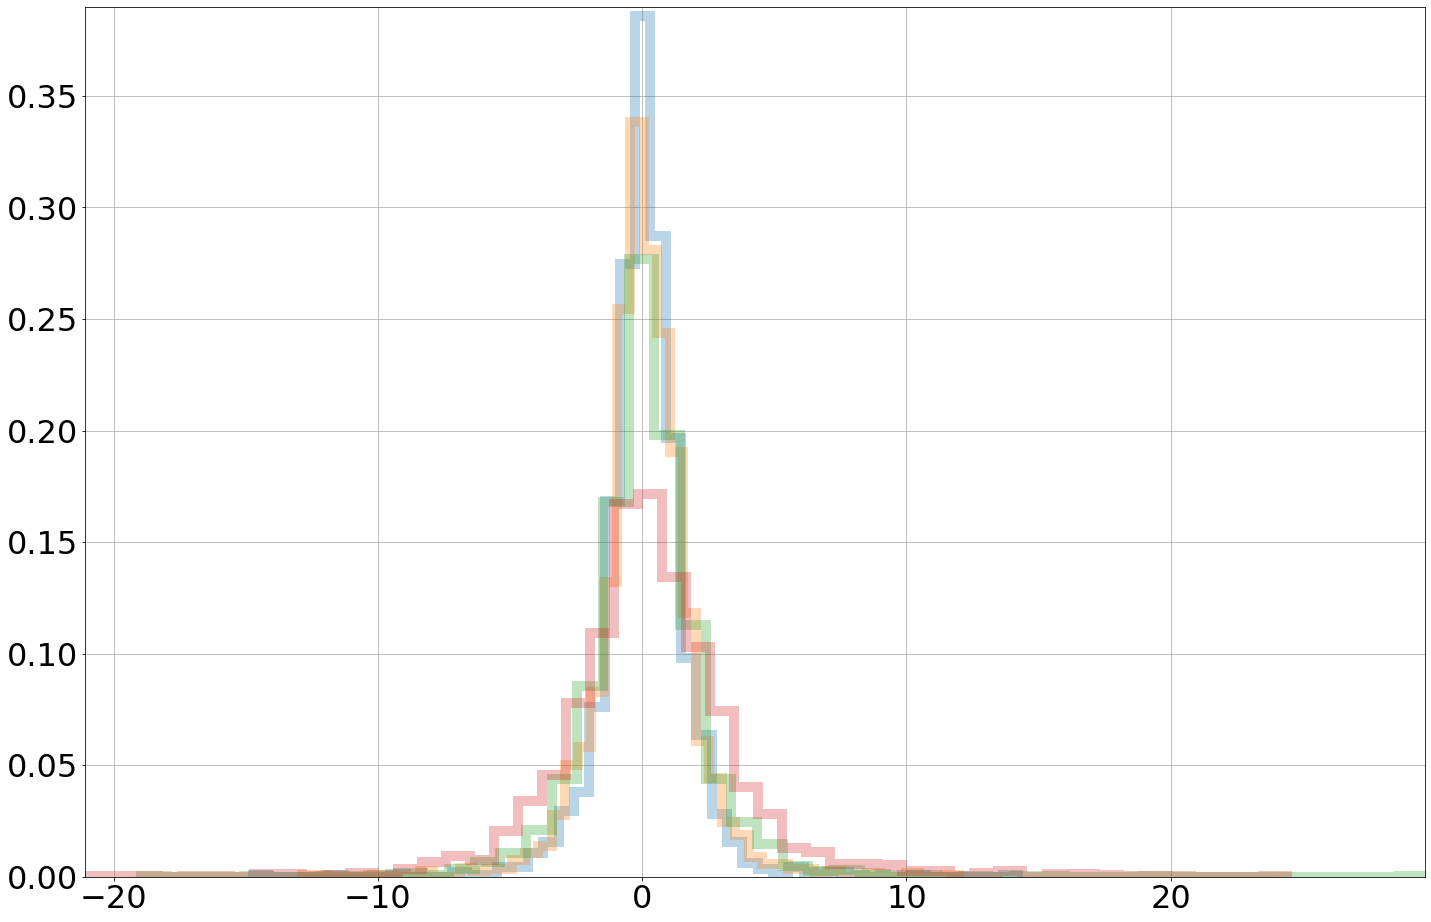

In [61]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)